### Contents 

* [DATA](#DATA)
* [Least Squares Line](#Least-Squares-Line)
---
* [Linear Regression with SciKit-Learn](#Linear-Regression-with-SciKit-Learn)
    1. [Train | Test Split](#Train-|-Test-Split)
    2. [Creating a Model (Estimator)](#Creating-a-Model-(Estimator))
    3. [Calculate Performance on Test Set](#Calculate-Performance-on-Test-Set)
    4. [Retraining Model on Full Data](#Retraining-Model-on-Full-Data)
    5. [Model Persistence (Saving and Loading a Model)](#Model-Persistence-(Saving-and-Loading-a-Model))  
---
* [Polynomial Regression with SciKit-Learn](#$$Polynomial-\space-Regression-$$)
    1. [Preprocessing](#Preprocessing)
    2. [Creating a Model](#Creating-a-Model)
    3. [Choosing a Model](#Choosing-a-Model)
    4. [Deployment and Prediction](#Deployment-and-Prediction)
---
* [Regularization with SciKit-Learn](#$$Regularization$$)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


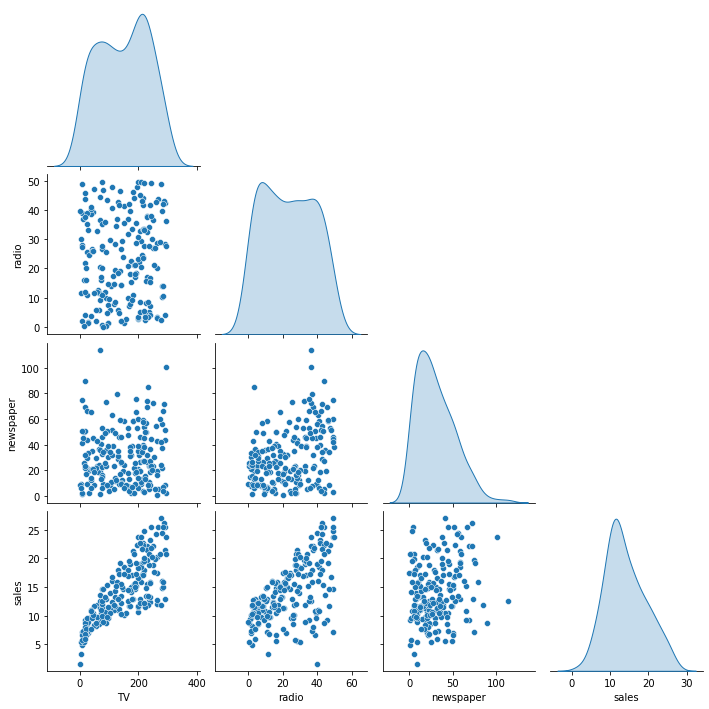

In [5]:
sns.pairplot(df, diag_kind='kde', corner=True)

<AxesSubplot:ylabel='sales'>

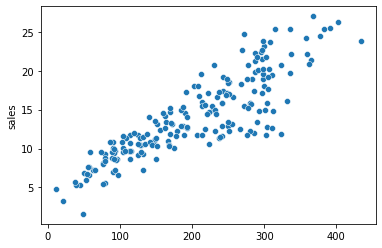

In [6]:
sns.scatterplot(x=df['TV']+df['radio']+df['newspaper'], y='sales', data=df)

# Least Squares Line
The Question here is     
**Is there a relationship between total advertising spend and sales?**

<AxesSubplot:ylabel='sales'>

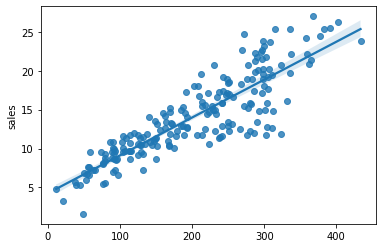

In [7]:
sns.regplot(x=df['TV']+df['radio']+df['newspaper'], y='sales' , data=df, x_ci='sd', order=1)

#### Estimating the Coefficients

In [8]:
np.polyfit(df['TV']+df['radio']+df['newspaper'], df['sales'], 1)

array([0.04868788, 4.24302822])

In [9]:
x = np.linspace(0,500,200)
y = 0.04868788*x + 4.24302822

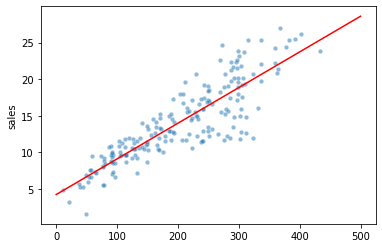

In [10]:
sns.scatterplot(x=df['TV']+df['radio']+df['newspaper'], y=df['sales'], alpha=0.5, s=20)
plt.plot(x,y, color='red')

#### Predicted Sales With Least Square Line
_Total Spend = 200_

In [11]:
# Predicted Sales 

0.04868788*200 + 4.24302822

13.98060422

# $$Linear \space Regression \space with \space SciKit-Learn$$
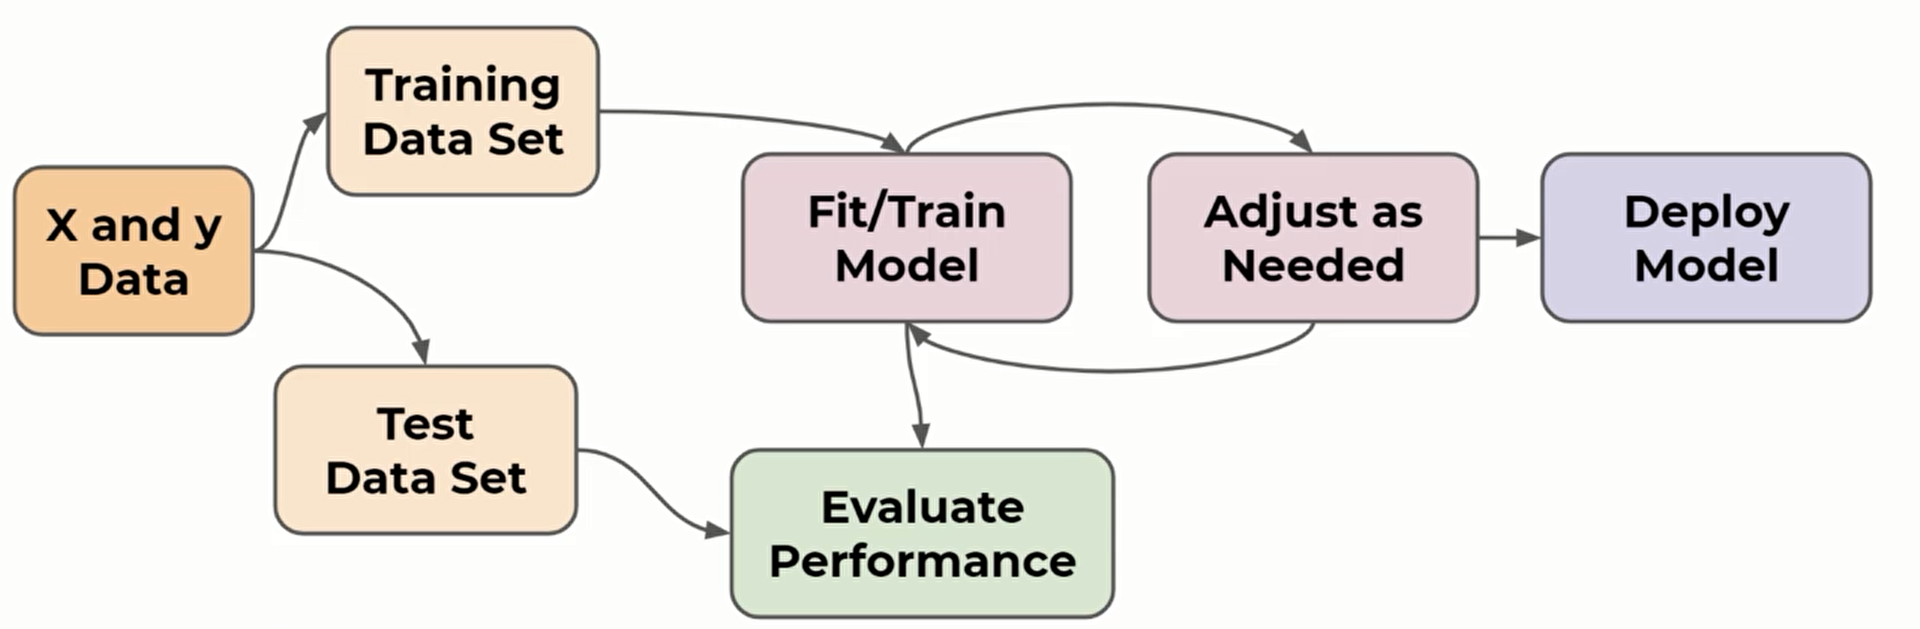

## Train | Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('sales', axis=1)
y = df['sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [16]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


## Creating a Model (Estimator)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

### Fit/Train the Model on the training data

In [19]:
model.fit(X_train, y_train)

LinearRegression()

## Calculate Performance on Test Set


### Metrics  
    
**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [20]:
test_predictions = model.predict(X_test)

In [21]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_predictions)

In [24]:
MSE = mean_squared_error(y_test, test_predictions)

In [25]:
RMSE = np.sqrt(MSE)

In [26]:
MAE

1.213745773614481

In [27]:
MSE

2.2987166978863796

In [28]:
RMSE

1.5161519375993884

Comparing The Error's Order With The Order of Data 

In [29]:
df['sales'].mean()

14.0225

-------------
-------------  
------------- 
#### Some Considerations Based On **[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)**

In [30]:
quartet = pd.read_csv('anscombes_quartet1.csv')

<div>
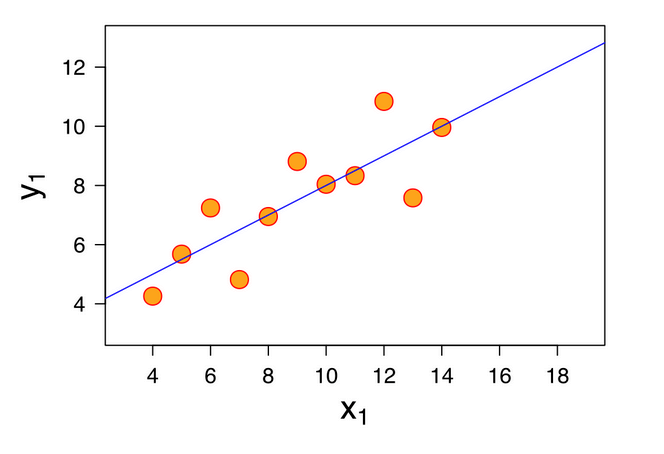
</div>


In [31]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

In [32]:
quartet

,x,y,pred_y,residual
0,10.0,8.04,8.0,0.04
1,8.0,6.95,7.0,-0.05
2,13.0,7.58,9.5,-1.92
3,9.0,8.81,7.5,1.31
4,11.0,8.33,8.5,-0.17
5,14.0,9.96,10.0,-0.04
6,6.0,7.24,6.0,1.24
7,4.0,4.26,5.0,-0.74
8,12.0,10.84,9.0,1.84
9,7.0,4.82,6.5,-1.68


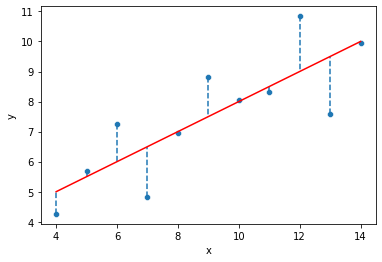

In [33]:
sns.scatterplot(data=quartet,x='x',y='y')

sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'], linestyles='--')

<AxesSubplot:xlabel='residual', ylabel='Density'>

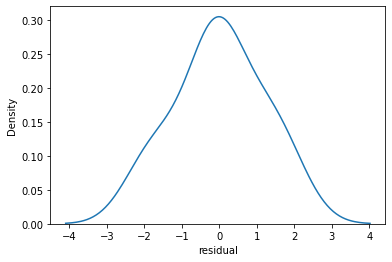

In [34]:
sns.kdeplot(quartet['residual'])

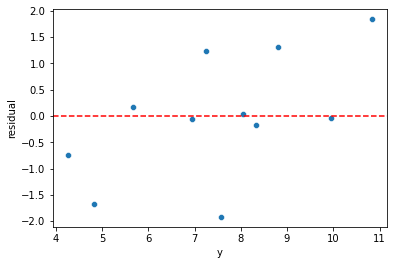

In [35]:
sns.scatterplot(data=quartet,x='y',y='residual')

plt.axhline(y=0, color='r', linestyle='--')

---------

In [36]:
quartet = pd.read_csv('anscombes_quartet2.csv')

<div>
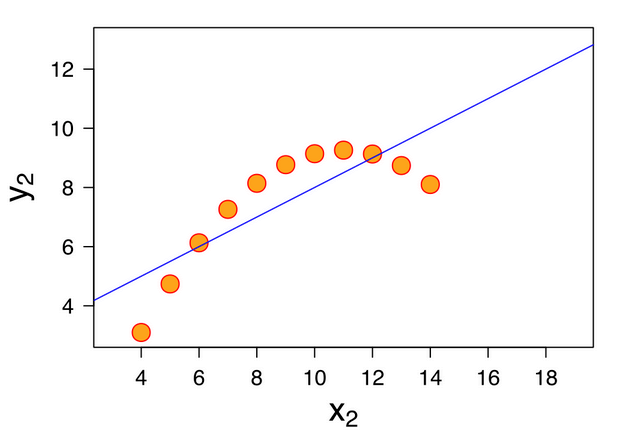
</div>

In [37]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

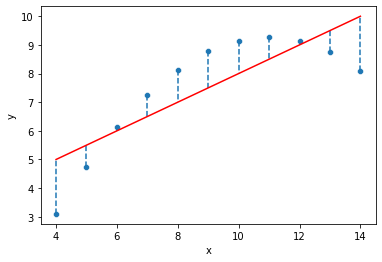

In [38]:
sns.scatterplot(data=quartet,x='x',y='y')

sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'], ls='--')

Some Bias in KDE dist. ...

<AxesSubplot:xlabel='residual', ylabel='Density'>

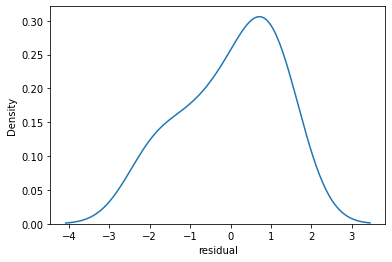

In [39]:
sns.kdeplot(quartet['residual'])

Some Obvious Bias in Residual plot ...

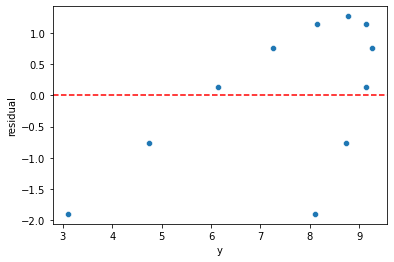

In [40]:
sns.scatterplot(data=quartet,x='y',y='residual')

plt.axhline(y=0, color='r', linestyle='--')

-----------

In [41]:
quartet = pd.read_csv('anscombes_quartet4.csv')

<div>
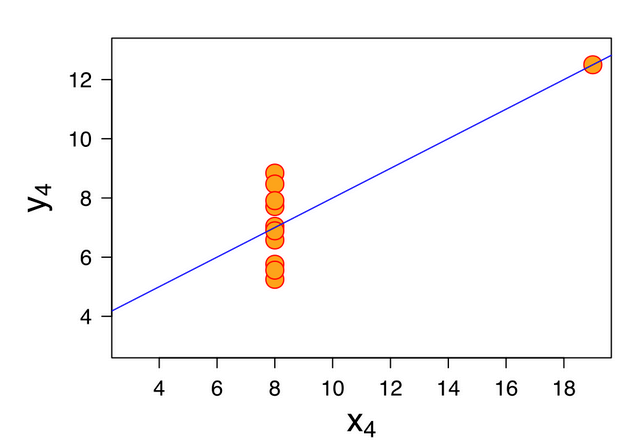
</div>


In [42]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

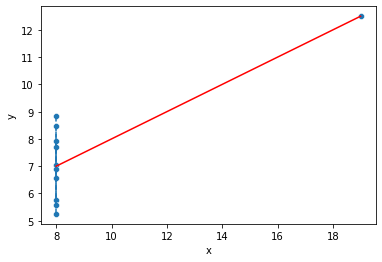

In [43]:
sns.scatterplot(data=quartet,x='x',y='y')

sns.lineplot(data=quartet,x='x',y='pred_y',color='red')

plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'], ls='--')

No Bias Seen in KDE plot ...

<AxesSubplot:xlabel='residual', ylabel='Density'>

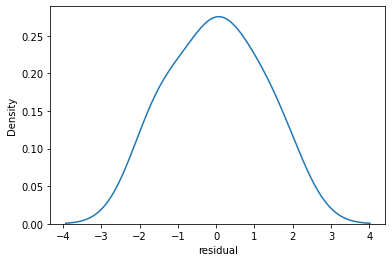

In [44]:
sns.kdeplot(quartet['residual'])

An Obvious Bias in Plotting Residuals  ...

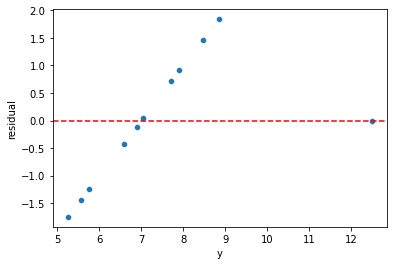

In [45]:
sns.scatterplot(data=quartet,x='y',y='residual')

plt.axhline(y=0, color='r', linestyle='--')

-------------------------
-----------
-----------

**So It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.**

### Plotting Residuals

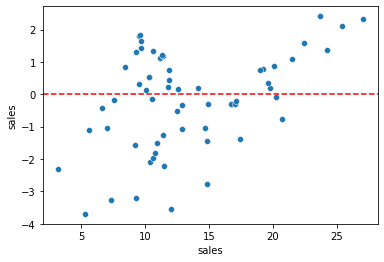

In [46]:
test_res = y_test - test_predictions

sns.scatterplot(x= y_test, y= test_res)

plt.axhline(y=0, color='r', ls='--')

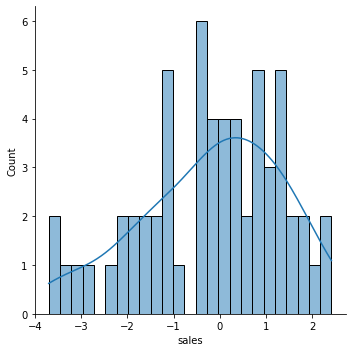

In [47]:
sns.displot(test_res, bins= 25, kde=True)

We can also check against the **normal probability plot**

In [48]:
import scipy as sp

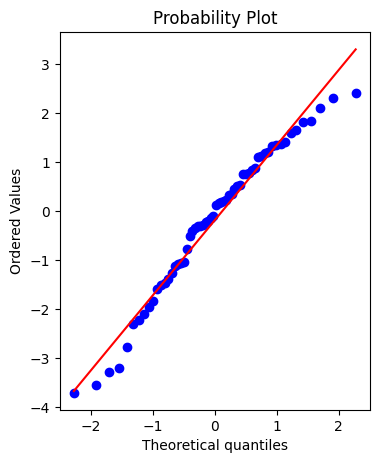

In [49]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(4,5),dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _

_ = sp.stats.probplot(test_res,plot=ax)

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data.

In [50]:
final_model = LinearRegression()

In [51]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

In [52]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [53]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


**Now We Predict:**

In [54]:
spend = [[150, 35, 10]]
final_model.predict(spend)

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.39176185])

## Model Persistence (Saving and Loading a Model)

In [55]:
from joblib import dump, load

In [56]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

Loading it ...

In [57]:
loaded_model = load('sales_model.joblib')

In [58]:
loaded_model.predict(spend)

C:\Users\rafes\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.39176185])

-------------------

# $$Polynomial \space Regression $$

**The equation in polynomial regression is in form of** 

$$ \hat{y} = \beta_0 + \beta_1 x_1  + \beta_1 x^2_1 +  ... + \beta_n x^n_1 + \epsilon$$

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.**

In [59]:
X = df.drop('sales', axis=1)

In [60]:
y = df['sales']

In this case we have $X = [x_1 , x_2, x_3 ] $ so our polynomial features would be $ [x_1, x_2, x_3, x_1^2,x_1x_2 , x_1 x_3, x_2^2, x_2 x_3 , x_3^2] $ 

## Preprocessing 

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly_convertor = PolynomialFeatures(degree=2, include_bias=False)   

We choose the `include_bias` to be `False` bcz later on we choose on our Linear Regression model the `fit_intercept` to be `True`.  

Now our convertor must read the whole data, and convert it to polynomial features ... 

In [63]:
poly_features = poly_convertor.fit_transform(X)

In [64]:
poly_features.shape

(200, 9)

In [65]:
X.shape

(200, 3)

In [66]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [67]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

### Train | Test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Creating a Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
poly_model = LinearRegression(fit_intercept=True)

In [72]:
poly_model.fit(X_train,y_train)

LinearRegression()

### Evaluation of the model

In [73]:
test_pred = poly_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
MAE = mean_absolute_error(y_test, test_pred)
MAE

0.48967980448035886

In [76]:
RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE

0.6646431757269

In [77]:
df['sales'].mean()

14.0225

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

## Choosing a Model

Perhaps a higher order would improve performance even more! But How about **Overfitting!!!**

Let's use a for loop to do the following:

1.    Create different order polynomial X data
2.    Split that polynomial data for train/test
3.    Fit on the training data
4.    Report back the metrics on both the train and test results
5.    Plot these results and explore overfitting


In [78]:
test_rmse = []
train_rmse = []

for i in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    poly_convertor = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    poly_model = LinearRegression(fit_intercept=True)
    poly_model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    test_pred = poly_model.predict(X_test)
    train_pred = poly_model.predict(X_train)
    
    # Calculate Errors
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # Append errors to lists for plotting later
    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

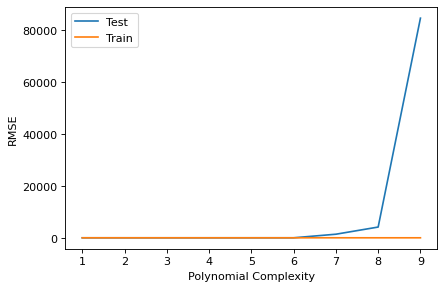

In [79]:
plt.figure(dpi=80)
plt.plot(range(1,10), test_rmse, label = 'Test')
plt.plot(range(1,10), train_rmse, label = 'Train')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

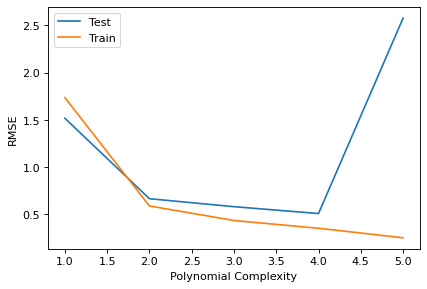

In [80]:
plt.figure(dpi=80)
plt.plot(range(1,6), test_rmse[:5], label = 'Test')
plt.plot(range(1,6), train_rmse[:5], label = 'Train')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### Finalizing Model Choice

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model


In [81]:
final_poly_convertor = PolynomialFeatures(degree=3, include_bias=False)

final_model = LinearRegression()

final_model.fit(final_poly_convertor.fit_transform(X),y)

LinearRegression()

### Saving Model and Convertor

In [82]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [83]:
dump(final_poly_convertor,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Prediction


In [84]:
load_poly = load('poly_converter.joblib')

In [85]:
load_model = load('sales_poly_model.joblib')

In [86]:
campaign = [[149,22,12]]

In [87]:
campaign_poly = load_poly.fit_transform(campaign)
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [88]:
load_model.predict(campaign_poly)

array([14.64501014])

# $$Regularization$$